## Assessing model fit
* In this chapter, you’ll learn how to ask questions of your model to assess fit. You’ll learn how to quantify how well a linear regression model fits, diagnose model problems using visualizations, and understand each observation's leverage and influence to create the model.

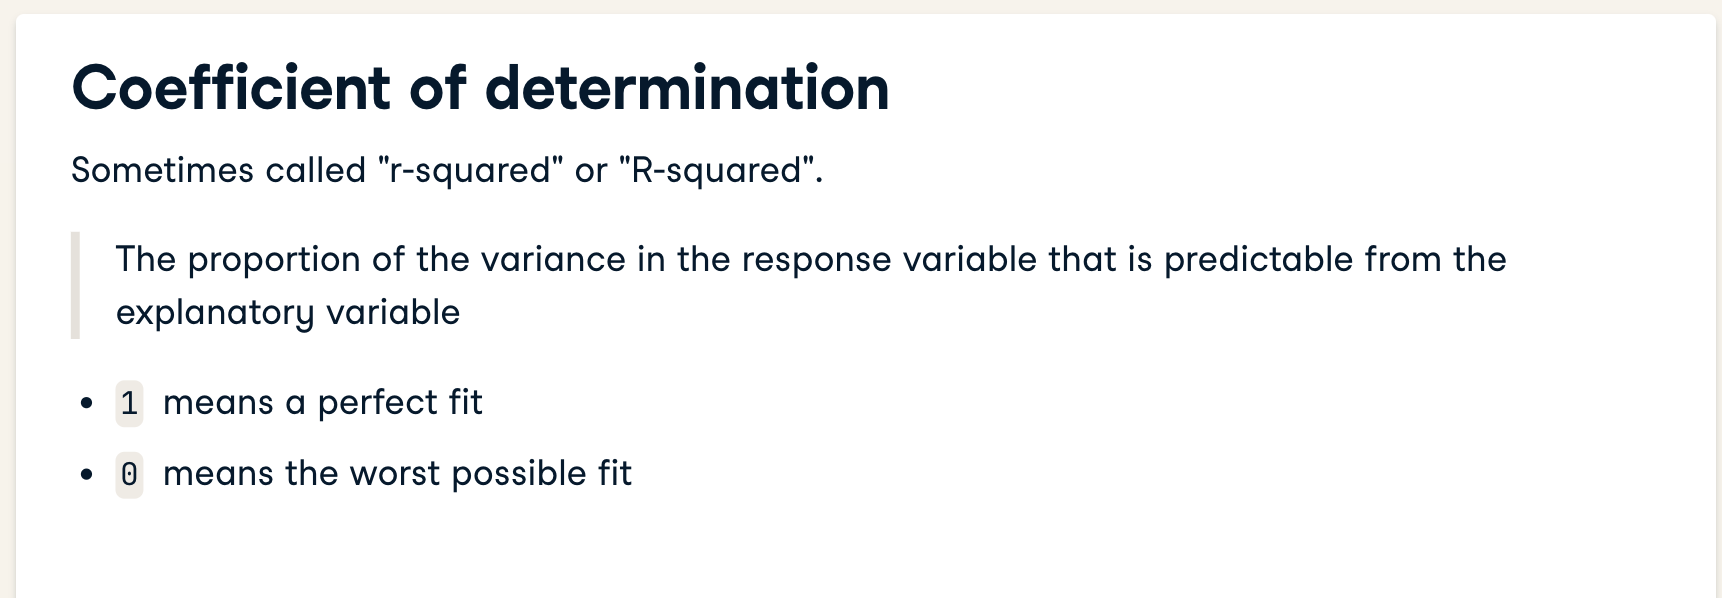
* The first metric we'll discuss is the coefficient of determination. 
* This is sometimes called "r-squared". 
* For boring historical reasons, it's written with a `lower case r` for simple linear regression and an `upper case R` when you have more than one explanatory variable. 
* It is defined as the proportion of the variance in the **response** variable that is predictable from the **explanatory variable**.
* A score of one means you have a perfect fit, and a score of zero means your model is no better than randomness. 

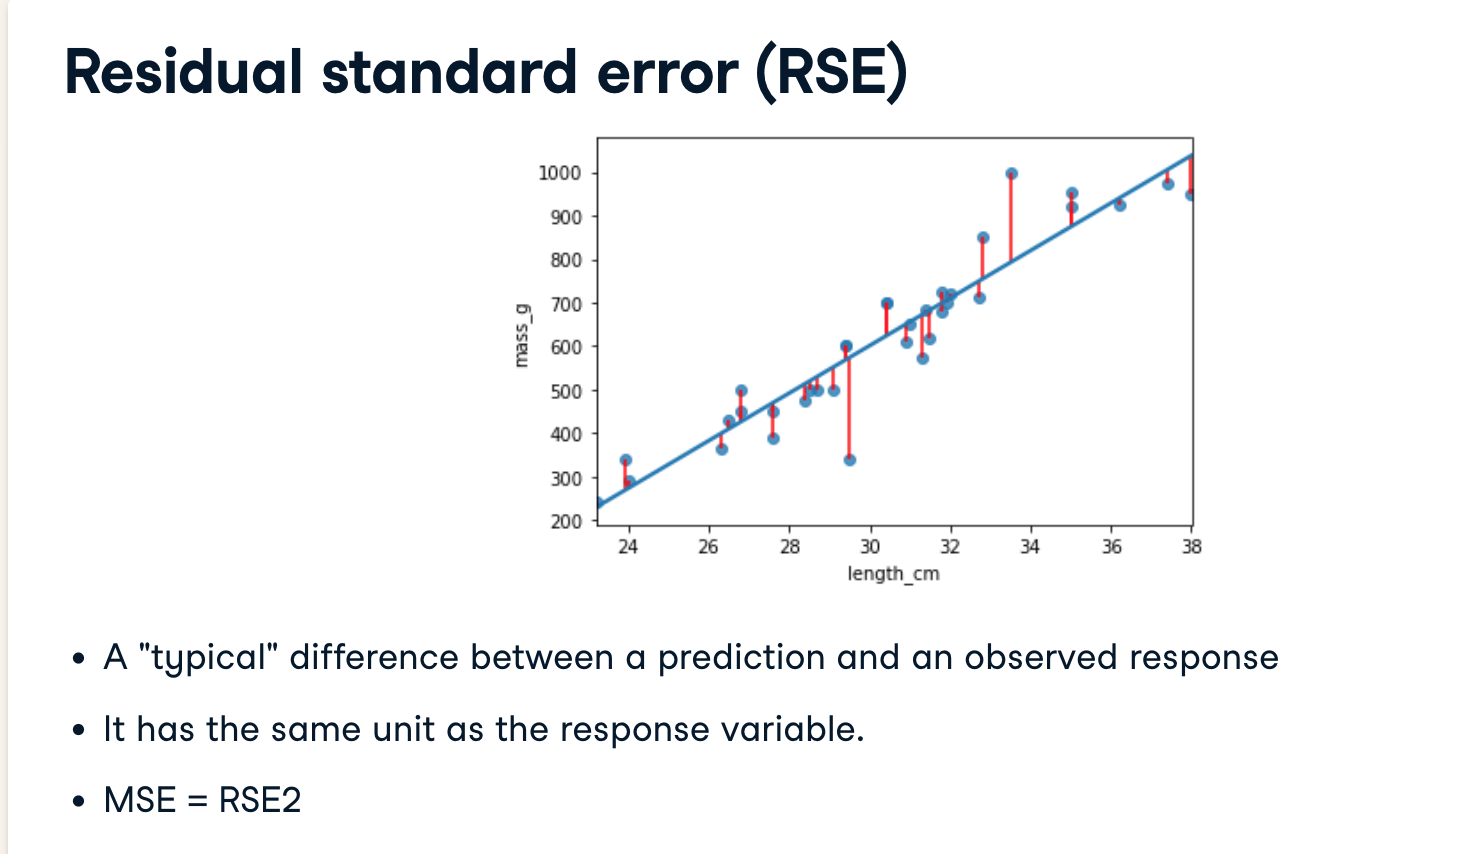
* The second metric we'll look at is the `residual standard error`, or **RSE**. 
* Recall that each `residual` is the **difference between a predicted value and an observed value**. 
* The RSE is, very roughly speaking, a measure of the typical size of the residuals. That is, how much the predictions are typically wrong. 
* It has the same unit as the response variable. In the fish models, the response unit is grams. 
* A related, but less commonly used metric is the `mean squared error`, or **MSE**. As the name suggests, `MSE` is the squared residual standard error.

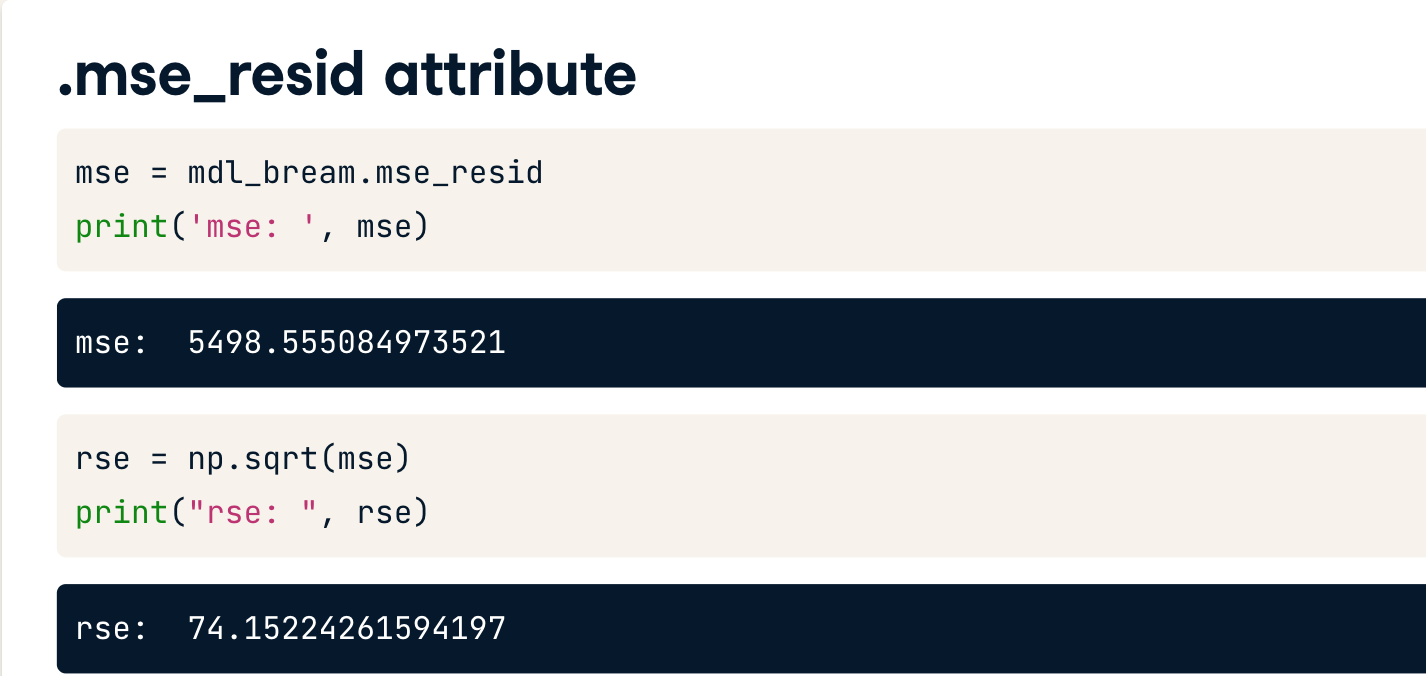

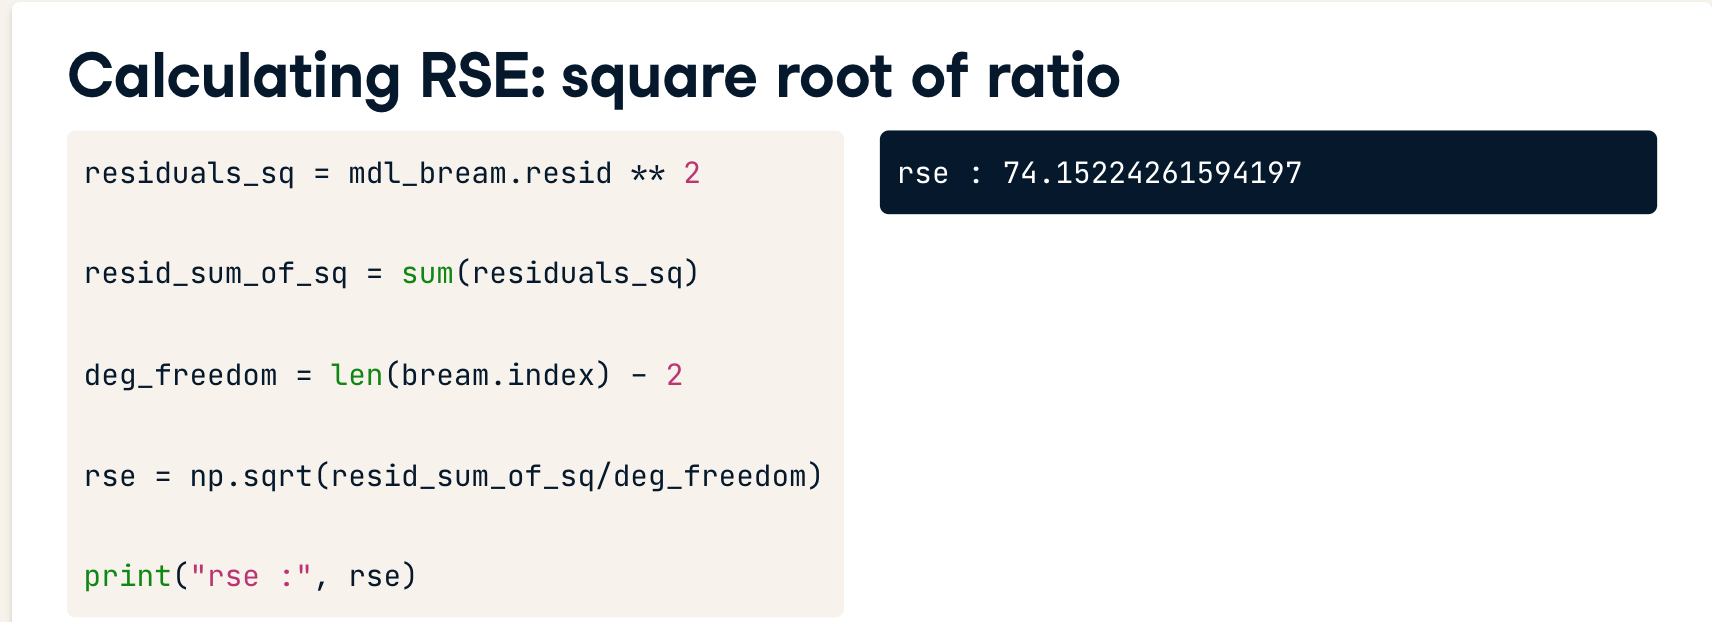

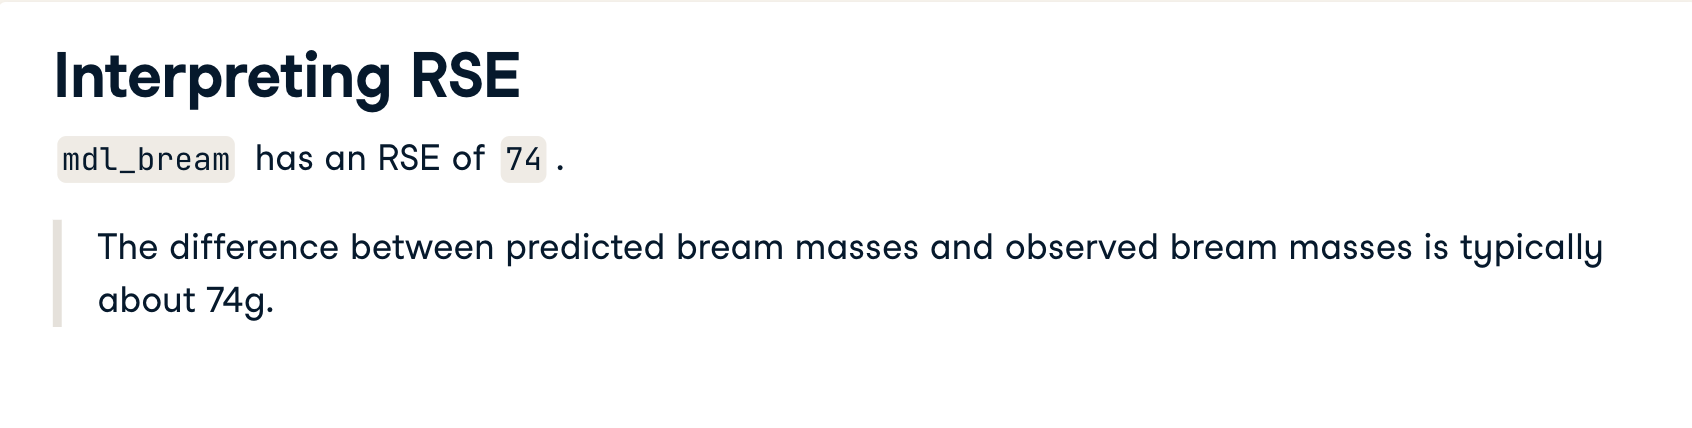

In [1]:
# Modeling Click Response to Impressions
import pandas as pd 
ad_conversion = pd.read_csv('../Datasets/ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [2]:
from statsmodels.formula.api import ols

mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions', data=ad_conversion).fit()
mdl_click_vs_impression_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:09:11   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133      0.033       0.135       3.231
n_impressions     0.0002   1.96e-06     87.654      0.000       0.000       0.000
==============================================================================
Omnibus:                      247.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13215.277
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      21.401   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# Adjust power of response/explanatory variable

ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** .25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** .25

mdl_click_vs_impression_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()
mdl_click_vs_impression_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:11:50   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


* The number of impressions explains 89% of the variability in the number of clicks.
* Transformed model has a better fit

#### Residual standard error
* `Residual standard error (RSE)` is a measure of the typical size of the residuals. 
* Equivalently, it's a measure of how wrong you can expect predictions to be. 
* Smaller numbers are better, with zero being a perfect fit to the data.

In [6]:
import numpy as np

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


* `mdl_click_vs_impression_orig` has an `RSE` of about 20.
    * The typical difference between observed number of clicks and predicted number of clicks is 20.

### Visualizing Model Fit
* If a linear regression model is a good fit, then the residuals are approximately normally distributed, with mean zero.

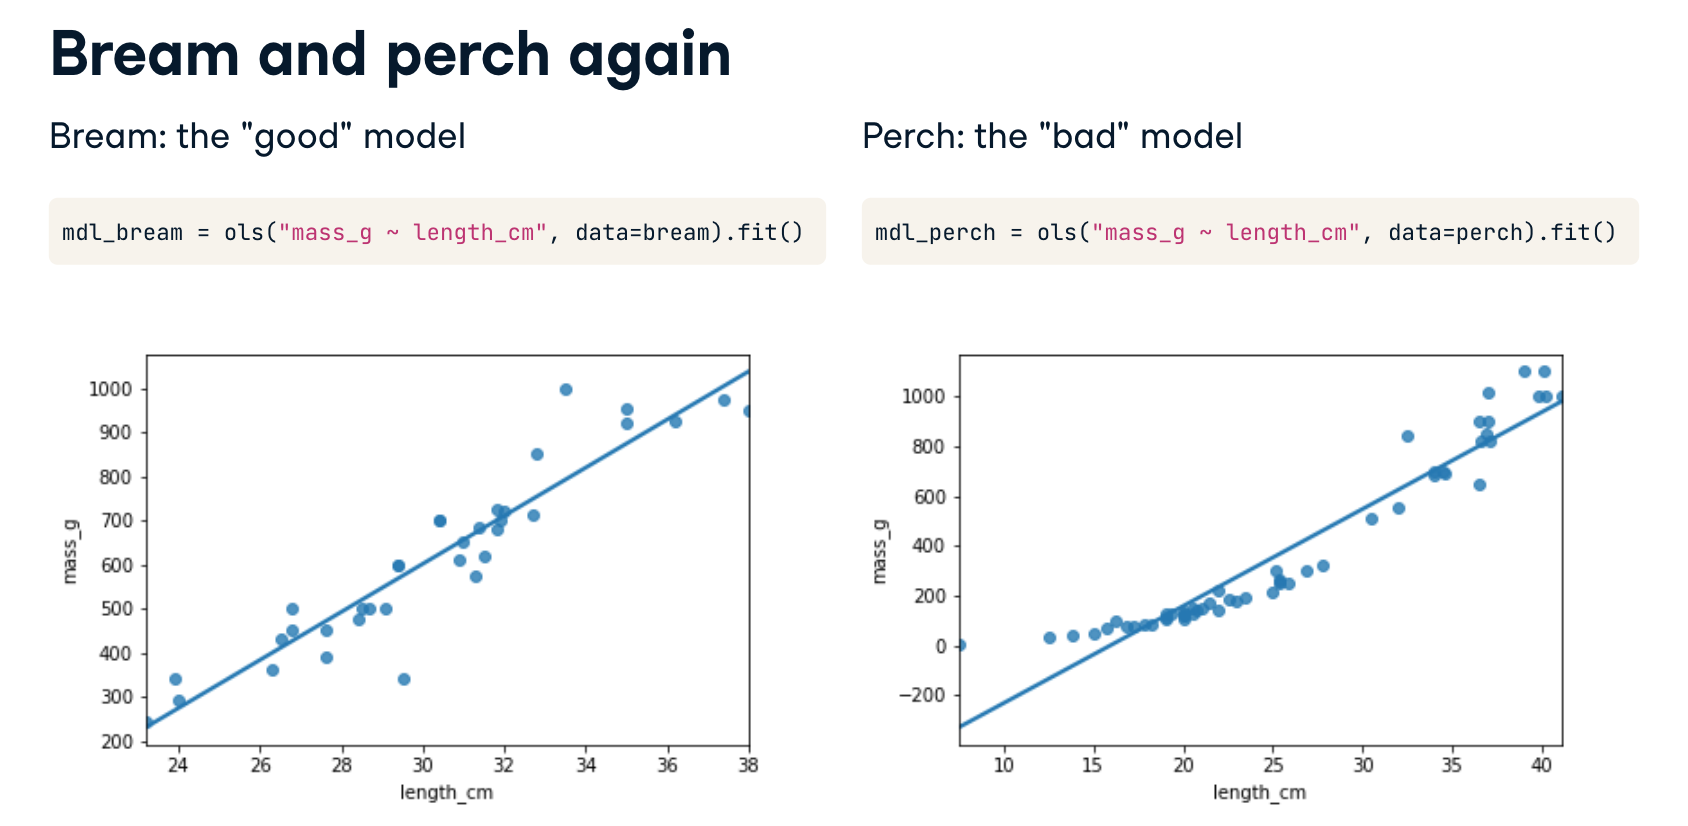
* From looking at the scatter plots with linear trend lines, it appeared that the bream model was a good fit, but the perch model wasn't because the observed masses increased faster than linearly with the lengths.

#### Residuals vs Fitted
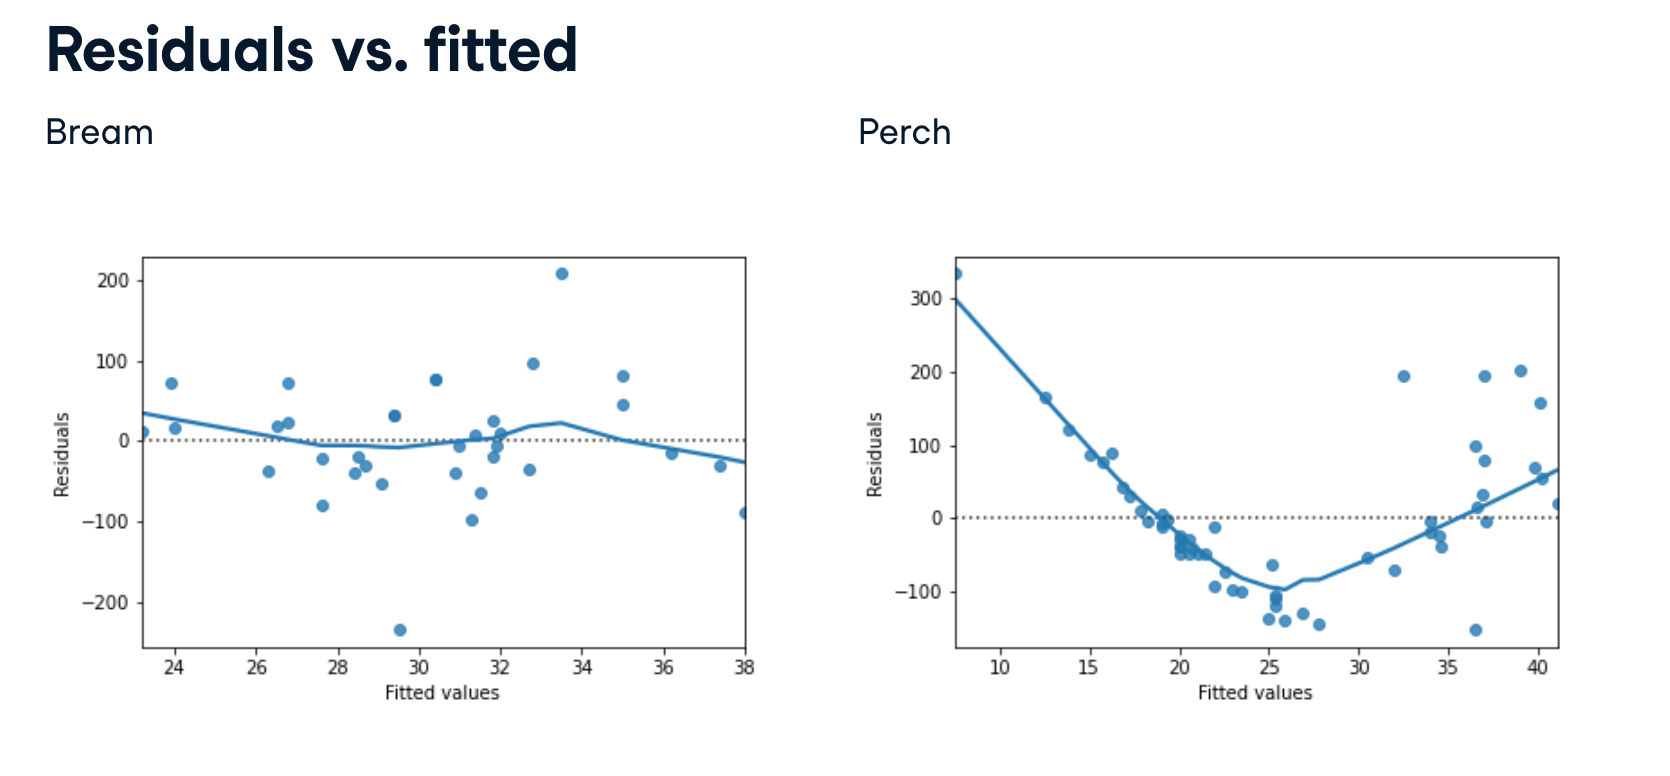

* The first diagnostic plot is of `residuals` versus `fitted values`. 
    * The blue line is a `LOWESS` trend line, which is a smooth curve following the data. 
    * These aren't good for making predictions but are useful for visualizing trends. 
* If residuals met the assumption that they are normally distributed with mean zero, then the trend line should closely follow the y equals zero line on the plot. 
* For the bream dataset, this is true. By contrast, the perch model doesn't meet the assumption. The residuals are above zero when the fitted value is small or big and below zero in the middle.

#### QQ Plot
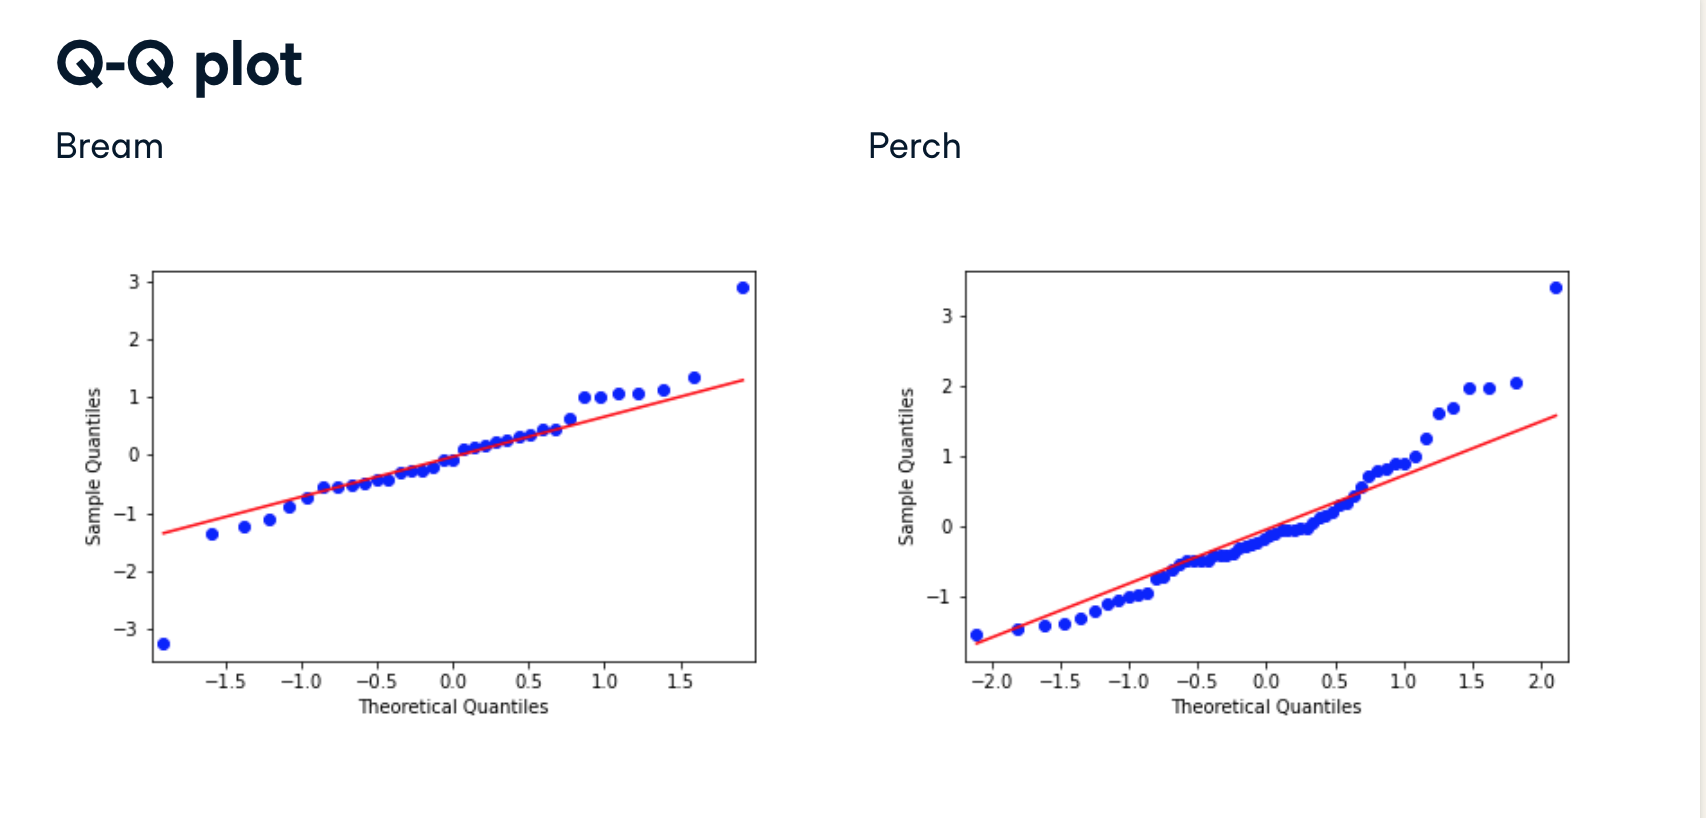

* The second diagnostic plot is called a `Q-Q plot`. 
    * It shows whether or not the residuals follow a normal distribution. 
* On the x-axis, the points are quantiles from the normal distribution. On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. 
* It sounds technical, but interpreting this plot is straightforward. 
    * If the points track along the straight line, they are normally distributed. If not, they aren't. 
    * Here, most of the bream points follow the line closely. 
    * Two points at each extreme don't follow the line. 
    * These correspond to the rows of the bream dataset with the highest residuals. 
* The perch dataset doesn't track the line as closely. 
    * In particular, you can see on the right-hand side of the plot that the residuals are larger than expected.
    * That means the model is a particularly poor fit for the longer lengths of perch.

#### Scale-Location Plot
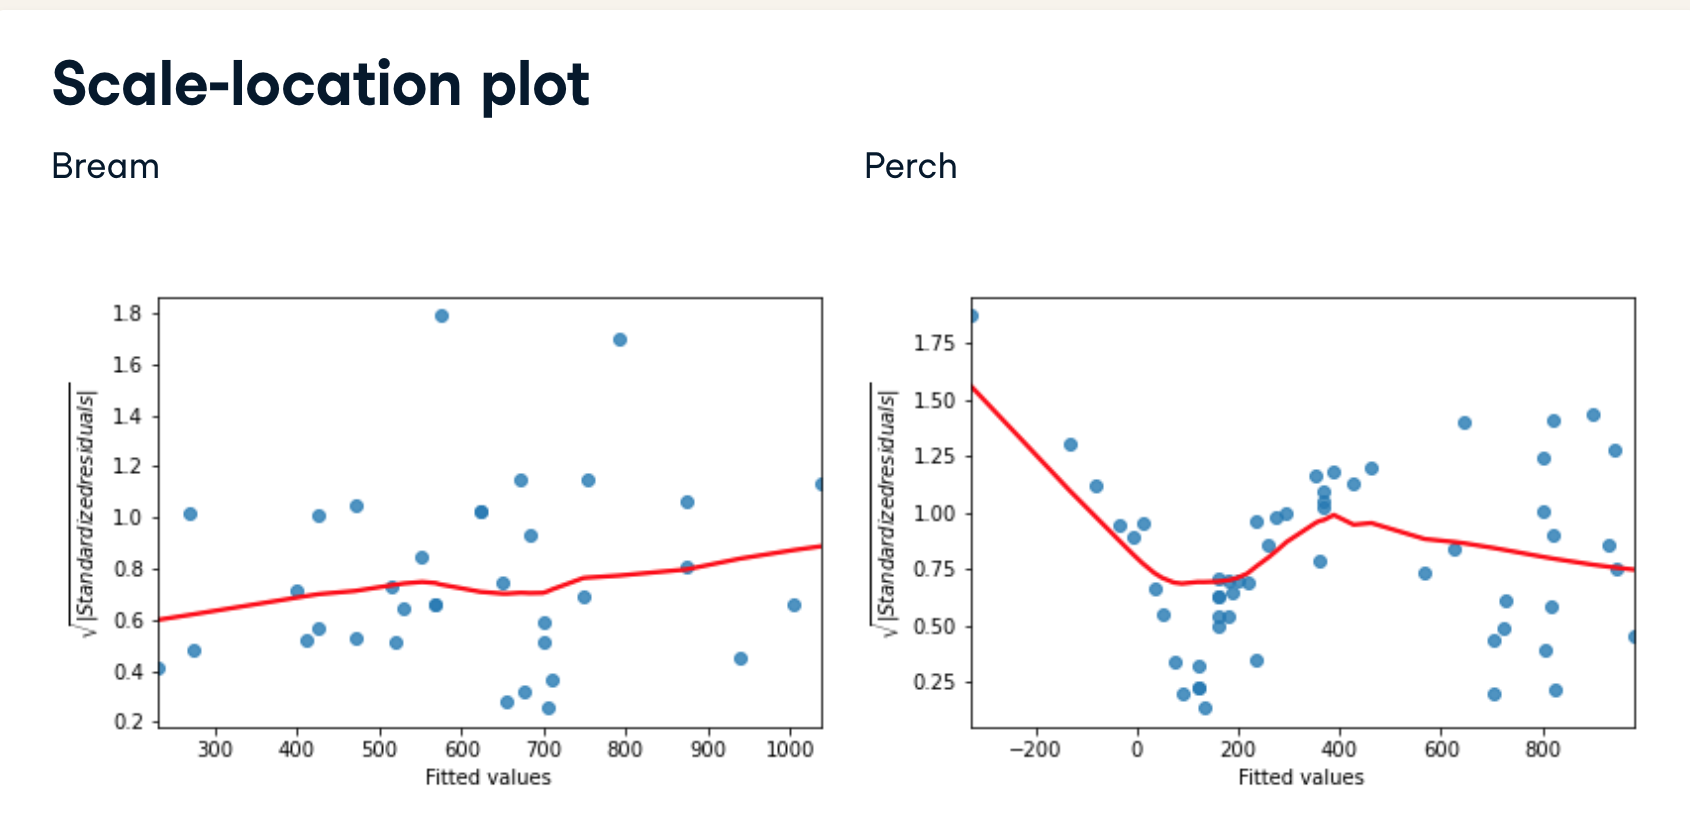
* The third plot shows the **square root of the standardized residuals** versus **the fitted values**. 
* It's often called a `scale-location plot`, because that's easier to say. 
    * Where the first plot showed whether or not the residuals go positive or negative as the fitted values change, this plot shows whether the size of the residuals gets bigger or smaller. 
* The residuals for the bream dataset get a little bigger as the fitted values increase, but it's not a huge change. 
    * Again, the plot of the perch model has a trend line that goes up and down all over the place, indicating a poor fit

#### Residplot
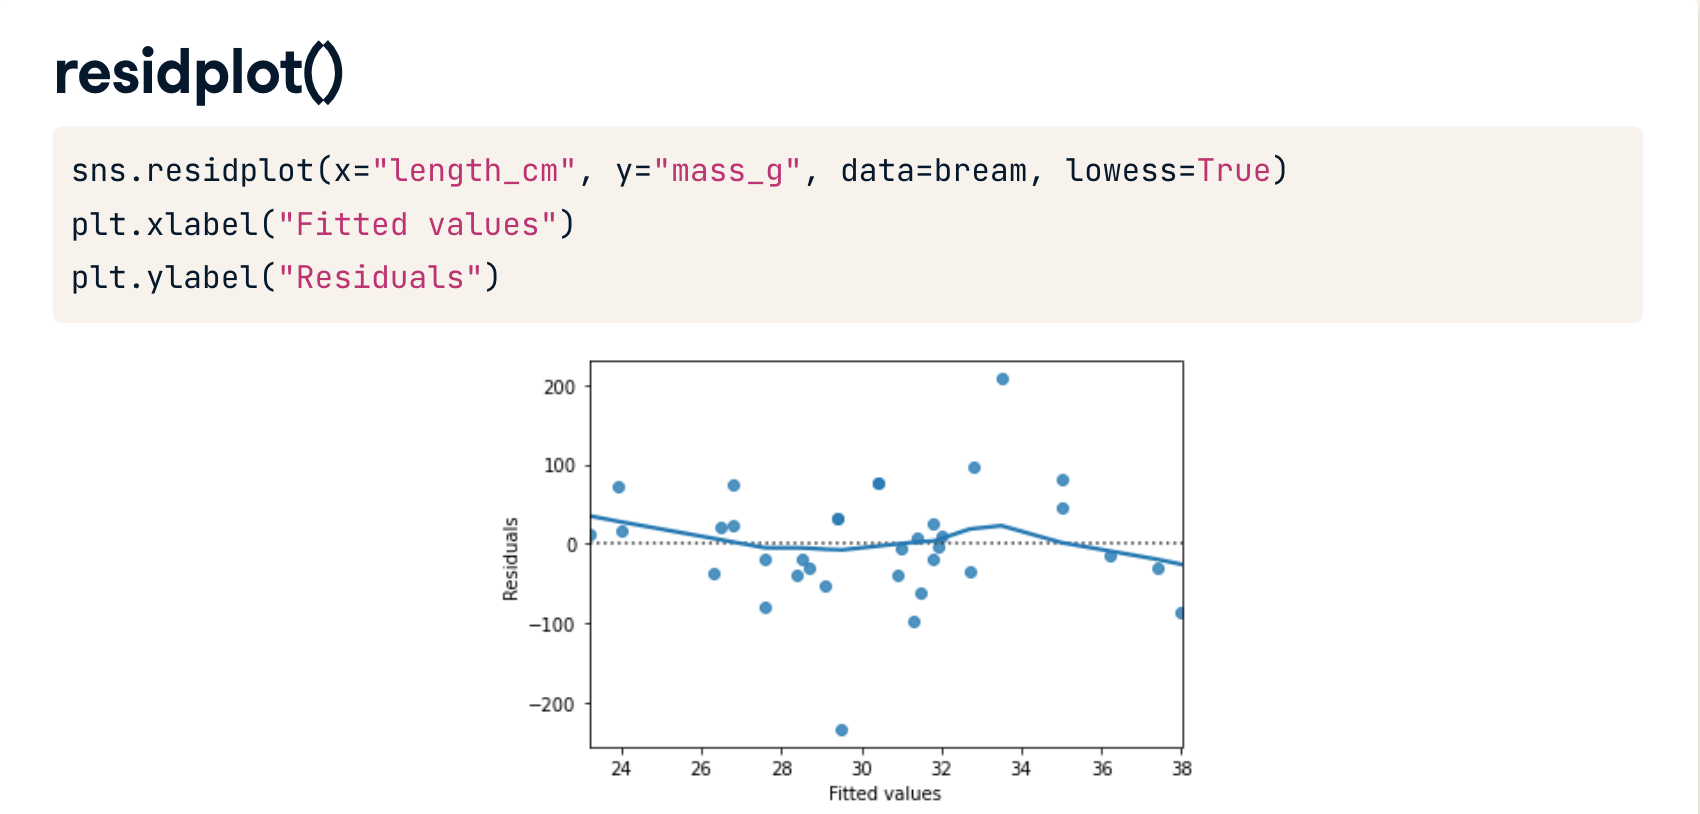
* Visualize the trend of your residuals 

#### QQPlot
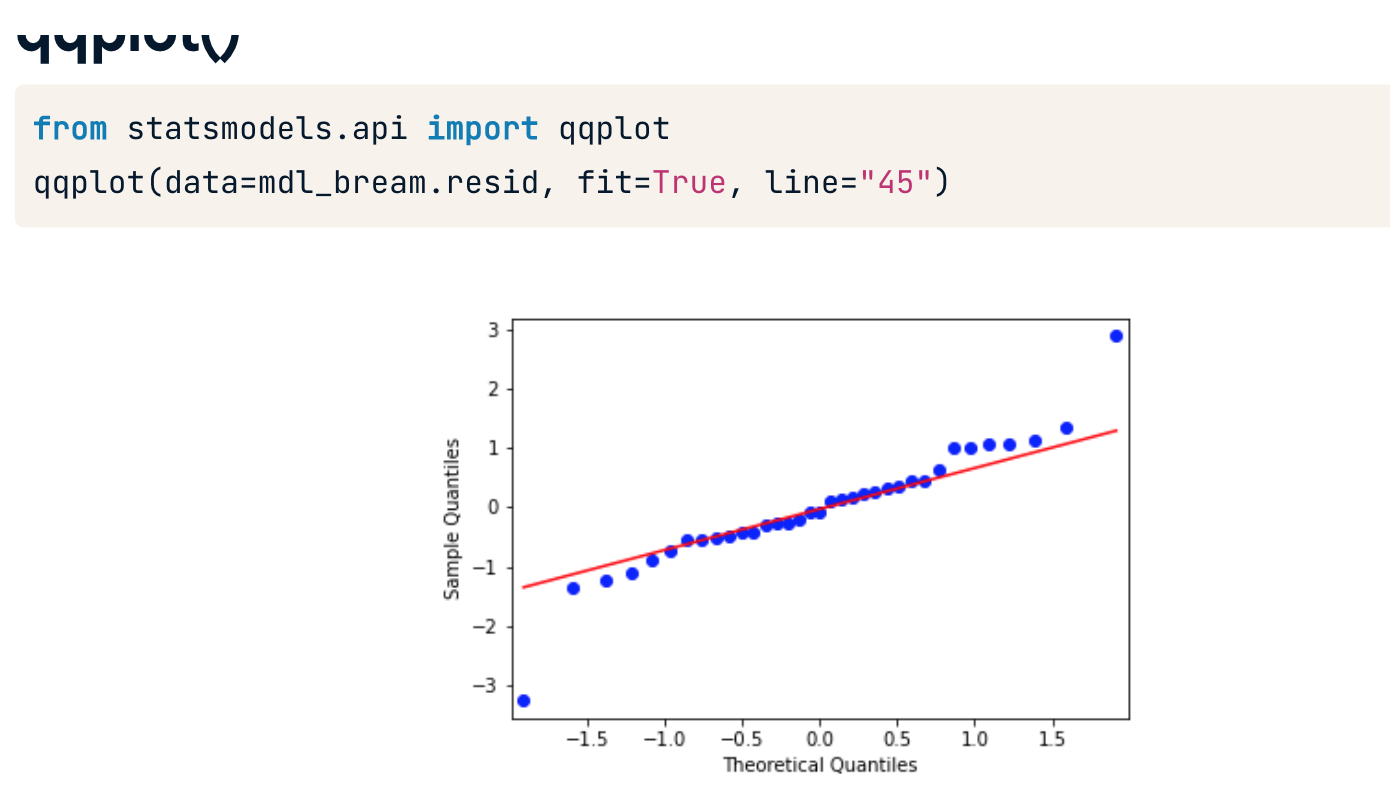
* To draw a `Q-Q plot`, you can use the qqplot function from the statsmodels package. 
    * You set the residuals of the model as your data argument and the fit argument to True. 
    * This will compare the data quantiles to a normal distribution. 
    * The last argument is optional, but when set to "45", set as a string, it will draw a 45-degree line on your plot, making it easier to interpret the pattern.

#### Drawing Diagnostic Plots

In [8]:
taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


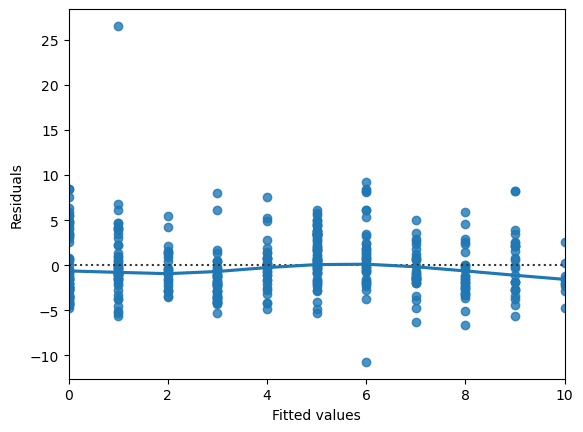

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(x='n_convenience', y='price_twd_msq', lowess=True, data=taiwan_real_estate)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

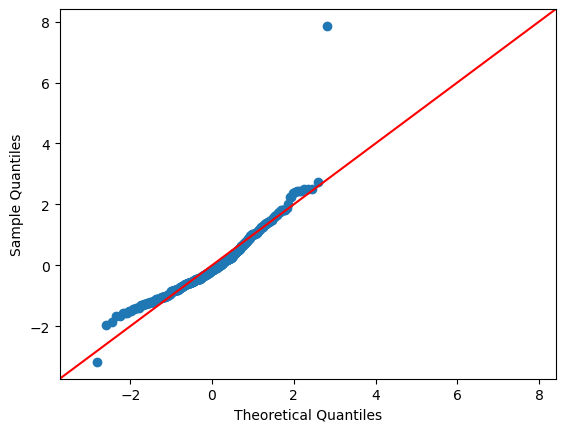

In [15]:
# Import qqplot
from statsmodels.api import qqplot

# Create Fitted model to pass residuals to QQ plot
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Create the Q-Q plot of the residuals (Inclue line argument for normal distribution line)
qqplot(data=mdl_price_vs_conv.resid, fit=True, line='45')
plt.show()

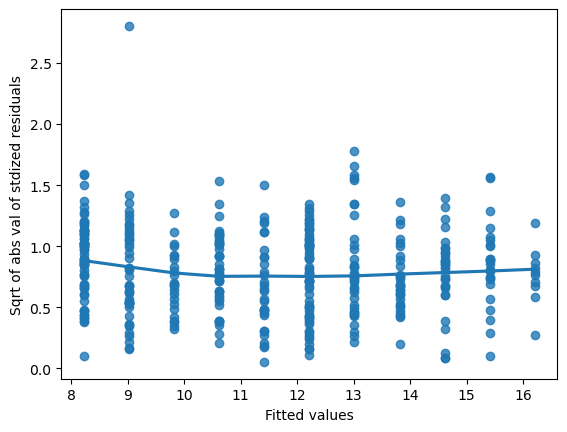

In [16]:
## Scale-loc plot

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

In [27]:
# Take a quick peak into some of our residual items

display(len(mdl_price_vs_conv.fittedvalues), len(model_norm_residuals_abs_sqrt))

resid_df = pd.DataFrame({
    'fittedPriceValues': mdl_price_vs_conv.fittedvalues,
    'model_norm_residuals': model_norm_residuals,
    'Normalized AbsSqrt Residuals' : model_norm_residuals_abs_sqrt
}).head(15)
resid_df

414

414

,fittedPriceValues,model_norm_residuals,Normalized AbsSqrt Residuals
0,16.205035,-1.408618,1.186852
1,15.406955,-0.783286,0.885035
2,12.214636,0.620526,0.787735
3,12.214636,1.292031,1.136675
4,12.214636,0.244484,0.494453
5,10.618477,-0.268085,0.517769
6,13.810795,-0.479041,0.692128
7,13.012716,0.330777,0.575132
8,9.022317,-0.987763,0.993863
9,10.618477,-1.163471,1.078643


In [25]:
# Quick look at the first row to spot check our normalized absolute value of the residuals
np.sqrt(np.abs(resid_df.iloc[0, :]['model_norm_residuals']))

1.1868520683710857